In [12]:
# import tensorflow as tf
# from d2l import tensorflow as d2l

# # # Define the model class
# # class WeightDecay(d2l.Classifier):
# #     def __init__(self, num_outputs, num_hiddens, lr, wd=0.01):
# #         super().__init__()
# #         self.save_hyperparameters()
# #         self.net = tf.keras.Sequential([
# #             tf.keras.layers.Flatten(),
# #             tf.keras.layers.Dense(num_hiddens, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
# #             tf.keras.layers.Dense(num_outputs, kernel_regularizer=tf.keras.regularizers.l2(wd))
# #         ])
    
# #     def loss(self, y_hat, y):
# #         base_loss = super().loss(y_hat, y)  # Base loss 
# #         l2_loss = tf.reduce_sum(self.net.losses)  # L2 regularization losses
# #         return base_loss + l2_loss  # Total loss = base loss + L2 regularization

# import tensorflow as tf
# from d2l import tensorflow as d2l

# class Data(d2l.DataModule):
#     def __init__(self, num_train, num_val, num_inputs, batch_size):
#         self.save_hyperparameters()
#         self.num_train = num_train  # Explicitly setting num_train
#         n = num_train + num_val
#         self.X = tf.random.normal((n, num_inputs))
#         noise = tf.random.normal((n, 1)) * 0.01
#         w, b = tf.ones((num_inputs, 1)) * 0.01, 0.05
#         self.y = tf.matmul(self.X, w) + b + noise

#     def get_dataloader(self, train):
#         i = slice(0, self.num_train) if train else slice(self.num_train, None)
#         return self.get_tensorloader([self.X, self.y], train, i)

# class WeightDecay(d2l.LinearRegression):
#     def __init__(self, wd, lr):
#         super().__init__(lr)
#         self.save_hyperparameters()
#         self.net = tf.keras.layers.Dense(
#             1, kernel_regularizer=tf.keras.regularizers.l2(wd),
#             kernel_initializer=tf.keras.initializers.RandomNormal(0, 0.01)
#         )

#     def loss(self, y_hat, y):
#         return super().loss(y_hat, y) + tf.reduce_sum(self.net.losses)

# # Function to train and track loss
# def train_and_plot(weight_decays):
#     # Generate dataset
#     num_train, num_val, num_inputs, batch_size = 100, 100, 200, 32
#     data = Data(num_train, num_val, num_inputs, batch_size)

#     # For each weight decay value, train the model
#     for w_d in weight_decays:
#         model = WeightDecay(wd=w_d, lr=0.01)
#         model.board.yscale = 'log'

#         # Use the Trainer to train the model
#         trainer = d2l.Trainer(max_epochs=10)
#         trainer.fit(model, data)

# # Define the different values for weight decay to test
# weight_decays = [0.00001, 0.0001, 0.001, 0.01, 0.1]

# # Train the models and plot the results
# train_and_plot(weight_decays)

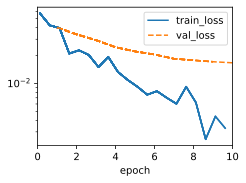

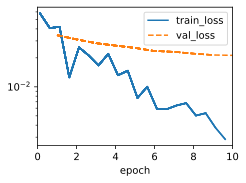

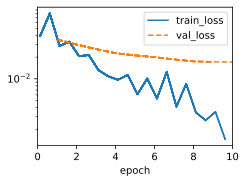

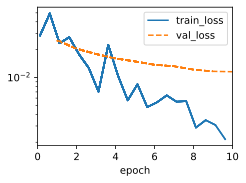

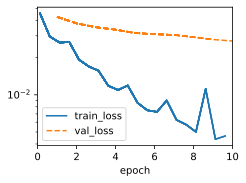

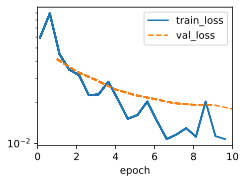

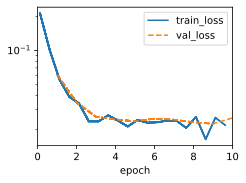

In [13]:
import tensorflow as tf
from d2l import tensorflow as d2l

class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        self.num_train = num_train  # Explicitly setting num_train
        n = num_train + num_val
        self.X = tf.random.normal((n, num_inputs))
        noise = tf.random.normal((n, 1)) * 0.01
        w, b = tf.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = tf.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.net = tf.keras.layers.Dense(
            1, kernel_regularizer=tf.keras.regularizers.l2(wd),
            kernel_initializer=tf.keras.initializers.RandomNormal(0, 0.01)
        )

    def loss(self, y_hat, y):
        return super().loss(y_hat, y) + tf.reduce_sum(self.net.losses)

# Function to train and track loss
def train_and_plot(weight_decays):
    # Generate dataset
    num_train, num_val, num_inputs, batch_size = 100, 100, 200, 32
    data = Data(num_train, num_val, num_inputs, batch_size)

    # For each weight decay value, train the model
    for w_d in weight_decays:
        model = WeightDecay(wd=w_d, lr=0.01)
        model.board.yscale = 'log'

        # Use the Trainer to train the model
        trainer = d2l.Trainer(max_epochs=10)
        trainer.fit(model, data)

# Define the different values for weight decay to test
weight_decays = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

# Train the models and plot the results
train_and_plot(weight_decays)